# Math 110B Project 2
# Yuxuan Wang 32614564

In [3]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

import numpy as np
import matplotlib.pyplot as plt

def generate_random_numbers(n, mu, sigma, dist="normal"):
    low = mu - (sigma/np.sqrt(3))
    high = mu + (sigma/np.sqrt(3))
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        return np.random.uniform(low, high, n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        


In [4]:
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")
y_test

array([ 0.05569652, -0.03390491, -0.13075975,  0.0395575 , -0.01435809])

# Task 1

In [5]:
np.random.seed(42)
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")


In [6]:
print("y1 is :", y1)
print("mean of y1 is:", np.mean(y1))
print("y2 is :", y2)
print("mean of y2 is:", np.mean(y2))


y1 is : [ 9.96714153e-01  3.61735699e-01  1.14768854e+00  2.02302986e+00
  2.65846625e-01  2.65863043e-01  2.07921282e+00  1.26743473e+00
  3.05256141e-02  1.04256004e+00  3.65823072e-02  3.42702464e-02
  7.41962272e-01 -1.41328024e+00 -1.22491783e+00 -6.22875292e-02
 -5.12831120e-01  8.14247333e-01 -4.08024076e-01 -9.12303701e-01
  1.96564877e+00  2.74223700e-01  5.67528205e-01 -9.24748186e-01
 -4.43827245e-02  6.10922590e-01 -6.50993577e-01  8.75698018e-01
 -1.00638690e-01  2.08306250e-01 -1.01706612e-01  2.35227818e+00
  4.86502775e-01 -5.57710929e-01  1.32254491e+00 -7.20843650e-01
  7.08863595e-01 -1.45967012e+00 -8.28186049e-01  6.96861236e-01
  1.23846658e+00  6.71368281e-01  3.84351718e-01  1.98896304e-01
 -9.78521990e-01 -2.19844208e-01  3.93612290e-02  1.55712223e+00
  8.43618290e-01 -1.26304016e+00  8.24083969e-01  1.14917720e-01
 -1.76922000e-01  1.11167629e+00  1.53099952e+00  1.43128012e+00
 -3.39217523e-01  1.90787624e-01  8.31263431e-01  1.47554513e+00
  2.08257622e-02 

In [7]:
# Two orderings to experiment with
# Random ordering with replacement In this case, we do not choose the fixed ordering, we sample a number in  {1,2,…,n}  each time and follow the iteration.

# Random ordering without replacement In this case, we do not choose the fixed ordering, we sample an ordering without replacement from  {1,2,…,n}  and then follow the iteration.

In [8]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task1(y):
    n = len(y)
#     np.random.seed(42)
    ordering = np.random.choice(n, n, replace=True)
    history = np.zeros(n)
    x = 0
    for i in range(n):
        a = 0
        for j in range(n):
            a += (x - y[j])**2
        history[i] = (1/2)*a
        x = x - (1/(i+1))*(x - y[ordering[i]])
    
    return history, x
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y):
    n = len(y)
#     np.random.seed(42)
    ordering = np.random.choice(n, n, replace = False)
    history = np.zeros(n)
    x = 0
    for i in range(n):
        a = 0
        for j in range(n):
            a += (x - y[j])**2
        history[i] = (1/2)*a
        x = x - (1/(i+1))*(x - y[ordering[i]])
    
    return history, x
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    

In [9]:
[wr_history1, x] = IGD_wr_task1(y1)
x

0.3376512751971612

In [10]:
[wr_history2, x] = IGD_wr_task1(y2)
x

0.5122155073238648

In [11]:
[wo_history1, x] = IGD_wo_task1(y1)
x

0.3711719495081946

In [12]:
[wo_history2, x] = IGD_wo_task1(y2)
x

0.49021475410775756

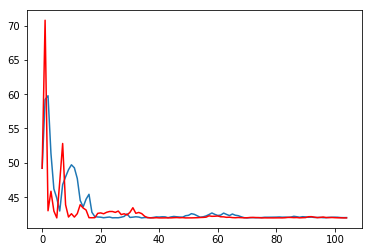

In [13]:
plt.plot(np.arange(105), wr_history1)
plt.plot(np.arange(105), wo_history1, 'r')

plt.show()

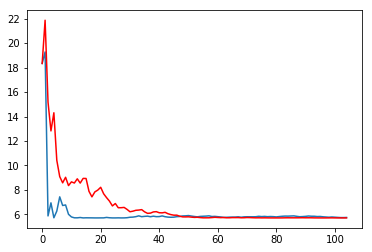

In [14]:
plt.plot(np.arange(105), wr_history2)
plt.plot(np.arange(105), wo_history2, 'r')

plt.show()

# The steps are chosen using a without-replacement sampling strategy is better since it converges to the smaple mean: 0.3711 and 0.4902, for sample y1 and y2 respectively.

# Task 2

In [37]:
# IGD, the ordering is permitted to have replacement. 
#
#
beta = np.random.uniform(1,2,105)

def IGD_wr_task2(beta, y):
    n = len(beta)
    ordering = np.random.choice(n, n, replace=True)
    np.random.seed(42)
    gamma = 0.7*min(1/beta)
    
    history = np.zeros(n)
    subsqrt = np.zeros(n)
    x = 0
    
    for i in range(n):
        a = 0
        for j in range(n):
            a += beta[j]*((x - y)**2)
        subsqrt[i] = a
        history[i] = (1/2)*subsqrt[i]
        x = x - gamma * beta[ordering[i]]*(x - y)
        print(x)    
    return history, x
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task2(beta, y):
    n = len(beta)
    ordering = np.random.choice(n, n, replace=False)
    np.random.seed(42)
    beta = np.random.uniform(1,2,n)
    gamma = 0.7*min(1/beta)
    
    history = np.zeros(n)
    subsqrt = np.zeros(n)
    x = 0
    
    for i in range(n):
        a = 0
        for j in range(n):
            a += beta[j]*((x - y)**2)
        subsqrt[i] = a
        history[i] = (1/2)*subsqrt[i]
        x = x - gamma * beta[ordering[i]]*(x - y)
        print(x)
    return history, x
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.


In [38]:
[wr_history2, x] = IGD_wr_task2(beta, 50)
x

22.76176961337864
35.37472269801214
41.464229999405326
44.574880958649615
47.618500053466754
49.135792595866356
49.6937143014555
49.82002262559704
49.932396796543166
49.95729126750598
49.977230917455046
49.989377763760125
49.99515102511579
49.99770529864073
49.99872295438003
49.999294954466095
49.999565330064314
49.9997423573718
49.99987980451752
49.99994392638318
49.999981645565406
49.999988523011865
49.99999275428901
49.99999599970738
49.999998405254516
49.99999936783197
49.99999978815025
49.99999988624953
49.99999993719938
49.99999997089027
49.99999998498707
49.99999999133239
49.99999999521469
49.99999999820089
49.999999999409994
49.99999999977001
49.99999999987651
49.99999999996295
49.9999999999786
49.999999999987644
49.999999999994614
49.99999999999703
49.999999999998394
49.999999999999254
49.99999999999977
49.99999999999993
49.999999999999964
49.99999999999998
49.999999999999986
49.99999999999999
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0

50.0

In [39]:
[wo_history2, x] = IGD_wo_task2(beta, 50)
x

28.317700811308306
40.10218546982799
44.56893009331038
48.19453038701465
49.2520356667632
49.71871254861121
49.90775307796634
49.95715453889333
49.97256014085066
49.9858482804992
49.9929876595498
49.99587945950906
49.99801668471756
49.9990806815989
49.999428548553794
49.99966128749743
49.999883614942746
49.999963526288205
49.9999870732694
49.99999253684242
49.99999544987069
49.999998530742225
49.99999919960037
49.99999969907866
49.999999832531465
49.9999998918581
49.99999993694518
49.999999959923954
49.99999997576622
49.99999999034941
49.99999999485503
49.999999998425736
49.999999999262435
49.99999999961543
49.99999999983118
49.99999999989755
49.99999999993927
49.9999999999784
49.999999999986684
49.99999999999344
49.99999999999762
49.999999999998714
49.99999999999923
49.999999999999766
49.99999999999992
49.99999999999997
49.999999999999986
49.99999999999999
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0


50.0

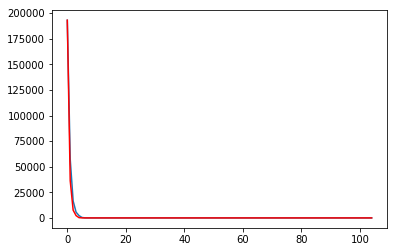

In [40]:
plt.plot(np.arange(105), wr_history2)
plt.plot(np.arange(105), wo_history2, 'r')

plt.show()

# The steps are chosen using a without-replacement sampling strategy is better . Even though, the plot showing that two strategys objection function values for each step is nearly overlaping, we print out the x values for each iteration will find out that without-replacement sampling strategy is converging faster. Also, if we change the parameter 0.95 into 0.1, we will find that the red line, representing without-replacement strategy objection function value, is below the blue line which shows converging faster.

# Task 3

In [41]:
# generation of exact solution and data y and matrix A.

def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

In [44]:
# We generate the problem with 200x100 matrix. rho as 0.01.
#
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [57]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task3(y, A):
    n = A.shape[0]
    
    ordering = np.random.choice(n, n, replace = True)
    x = np.zeros(A.shape[1])
    rho = 1e-3
    history = np.zeros(n)
    xstore = np.zeros([A.shape[1], n+1])
    
    for i in range(n):
        s = 0
        for j in range(n):
            a = A[j,:]
            s += (np.matmul(a, x) - y[j])**2
        history[i] = s
        v = A[ordering[i], :]
        k = rho * ((v @ x) - y[ordering[i]]) # scalar
        x = x - k * v
        xstore[:, i+1] = x
        
    return history, x, xstore
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A):
    n = A.shape[0]
    
    ordering = np.random.choice(n, n, replace = False)
    x = np.zeros(A.shape[1])
    rho = 1e-3
    history = np.zeros(n)
    xstore = np.zeros([A.shape[1], n+1])
    
    for i in range(n):
        s = 0
        for j in range(n):
            a = A[j,:]
            s += (np.matmul(a, x) - y[j])**2
        history[i] = s
        v = A[ordering[i], :]
        k = rho * ((v @ x) - y[ordering[i]]) # scalar
        x = x - k * v
        xstore[:, i+1] = x
        
    return history, x, xstore
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.


In [58]:
[wr_history3, x, xstorewr] = IGD_wr_task3(y, A)
x

array([ 8.59872207e-02,  1.01898593e-01, -1.10937944e-01,  2.29041311e-01,
        1.69125947e-01,  1.44542297e-02, -3.73737782e-02,  2.12048790e-01,
        8.88236908e-03,  1.93158157e-01,  1.69906320e-01,  2.61382054e-01,
        1.54467307e-01,  1.43409359e-01,  1.81426500e-01,  2.09903020e-01,
        1.61164811e-01,  1.61031582e-01,  1.49438190e-01, -4.60867301e-02,
       -1.13555911e-01,  1.31645059e-01,  1.19590496e-01,  1.01133722e-01,
        2.53493111e-01, -6.13561600e-02, -1.22856366e-01,  1.59453351e-01,
        1.35893846e-01, -4.38318151e-02, -2.61498712e-02,  4.54931833e-01,
        3.87047404e-02, -9.67257723e-02,  9.32957574e-02,  6.05581069e-02,
        5.60194915e-03,  7.59012579e-02,  2.27171815e-01, -3.50767637e-02,
        4.59292600e-02,  3.28487697e-01,  1.37885270e-01,  1.83815635e-01,
        2.67265548e-01, -1.09875541e-02, -1.41407199e-02,  7.87878461e-02,
        2.70572473e-03, -5.85572044e-02,  2.85960051e-01,  1.71587759e-01,
        6.04168546e-02,  

In [59]:
[wo_history3, x, xstorewo] = IGD_wr_task3(y, A)
x

array([ 0.17268208,  0.10314661,  0.02997623,  0.24084057,  0.05447138,
        0.13804691, -0.12762724,  0.39454396,  0.03821259,  0.35169405,
        0.20200214,  0.03393164,  0.09864541,  0.08458666,  0.29991966,
        0.17111607,  0.20110905,  0.29201711,  0.17704369, -0.09456724,
       -0.13082753,  0.05536471,  0.26727756,  0.16469821,  0.23493771,
        0.05676188, -0.0536527 ,  0.28311687, -0.02324912,  0.06937091,
        0.0480948 ,  0.33763006,  0.07251646, -0.02874426,  0.09271391,
        0.07259648,  0.03702635,  0.12258835,  0.13024073,  0.00553743,
        0.24135174,  0.25494507,  0.10585025,  0.26492786,  0.42196485,
       -0.06887426, -0.19151458,  0.11567477, -0.20923858,  0.10028287,
        0.33846427,  0.1993084 ,  0.0210266 ,  0.10791011,  0.41224105,
        0.09466938, -0.04253044,  0.0721747 ,  0.08739445,  0.02123898,
        0.21192618,  0.23533018,  0.08675639,  0.20343417,  0.17449522,
        0.1021916 ,  0.02735625,  0.02567282, -0.04134483,  0.40

In [60]:
xstorewr.shape

(100, 201)

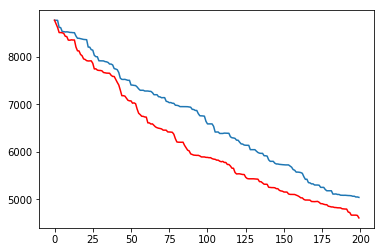

In [61]:
plt.plot(np.arange(200), wr_history3)
plt.plot(np.arange(200), wo_history3, 'r')

plt.show()

In [62]:
from numpy import linalg as LA
normwr = np.zeros(A.shape[0]+1)
normwo = np.zeros(A.shape[0]+1)
for i in range(A.shape[0]+1):
    normwr[i] = LA.norm(xstorewr[:, i] - xstar)
    normwo[i] = LA.norm(xstorewo[:, i] - xstar)


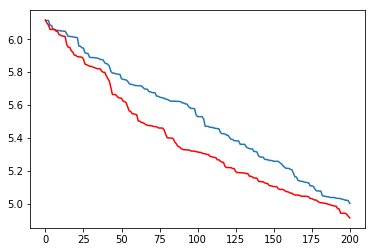

In [64]:
plt.plot(np.arange(201), normwr)
plt.plot(np.arange(201), normwo, 'r')

plt.show()